<a href="https://colab.research.google.com/github/swathysathesh/code-soft/blob/main/movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie Genre Classifiaction**

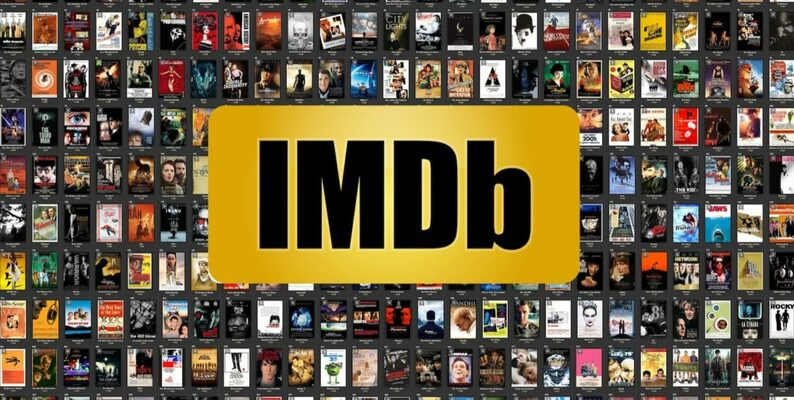

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Reading the dataset

In [3]:
df1=pd.read_csv('/content/train_data[1].txt',header=None,encoding='ISO-8859-1',sep=':::')
df1.columns=['id','movie','genere','description']
df1

<ipython-input-3-159827fcf37b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1=pd.read_csv('/content/train_data[1].txt',header=None,encoding='ISO-8859-1',sep=':::')


,id,movie,genere,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
df2=pd.read_csv('/content/test_data[1].txt',encoding='ISO-8859-1',header=None,sep=':::')
df2.columns=['id','movie','description']
df2

<ipython-input-4-292c74504342>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv('/content/test_data[1].txt',encoding='ISO-8859-1',header=None,sep=':::')


,id,movie,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [5]:
df3=pd.concat((df1,df2))
df3.reset_index(drop=True,inplace=True)
df3

,id,movie,genere,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
108409,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
108410,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
108411,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
108412,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


# Dataset Overview

In [6]:
df3.head()

,id,movie,genere,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
df3.tail()

,id,movie,genere,description
108409,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
108410,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
108411,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
108412,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."
108413,54200,Curitiba Zero Grau (2010),NaN,"Curitiba is a city in movement, with rhythms ..."


In [8]:
df3.shape

(108414, 4)

In [9]:
df3.dtypes

id              int64
movie          object
genere         object
description    object
dtype: object

In [10]:
df3.isna().sum()

id                 0
movie              0
genere         54200
description        0
dtype: int64

#Dataset Preprocessing

filling missing value

In [11]:
df3['genere'].fillna(df3['genere'].mode()[0],inplace=True)

dropping unnecessary columns

In [12]:
df3.drop(['id','movie'],axis=1,inplace=True)

In [13]:
df=df3['genere'].value_counts()
df

genere
 drama           67813
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<Axes: xlabel='genere', ylabel='count'>

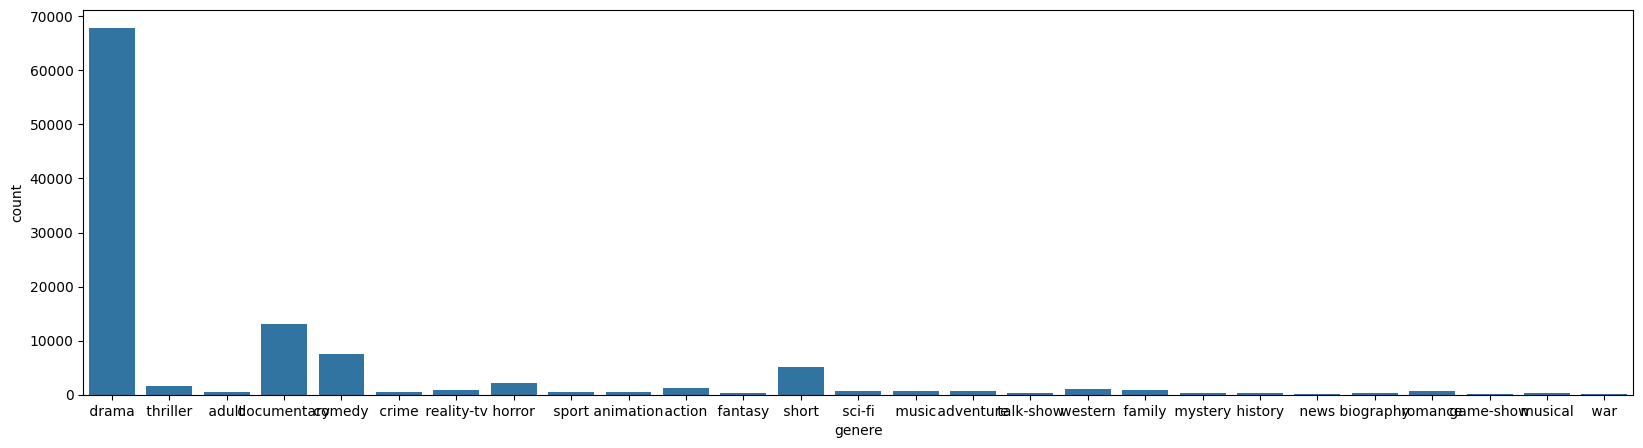

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='genere',data=df3)


In [15]:
tweet=df3.description
tweet

0          Listening in to a conversation between his do...
1          A brother and sister with a past incestuous r...
2          As the bus empties the students for their fie...
3          To help their unemployed father make ends mee...
4          The film's title refers not only to the un-re...
                                ...                        
108409     Covering multiple genres, Tales of Light & Da...
108410     As Alice and Cora Munro attempt to find their...
108411     A movie 169 years in the making. Oliver Twist...
108412     Popular, but mysterious rock D.J Mike Mallard...
108413     Curitiba is a city in movement, with rhythms ...
Name: description, Length: 108414, dtype: object

Tokenization

In [16]:
from nltk import TweetTokenizer
tt=TweetTokenizer()
tweet=tweet.apply(lambda x:tt.tokenize(x)).apply(lambda x:' '.join(x))
tweet

0         Listening in to a conversation between his doc...
1         A brother and sister with a past incestuous re...
2         As the bus empties the students for their fiel...
3         To help their unemployed father make ends meet...
4         The film's title refers not only to the un-rec...
                                ...                        
108409    Covering multiple genres , Tales of Light & Da...
108410    As Alice and Cora Munro attempt to find their ...
108411    A movie 169 years in the making . Oliver Twist...
108412    Popular , but mysterious rock D . J Mike Malla...
108413    Curitiba is a city in movement , with rhythms ...
Name: description, Length: 108414, dtype: object

Remove special characters

In [17]:
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')
tweet

0         Listening in to a conversation between his doc...
1         A brother and sister with a past incestuous re...
2         As the bus empties the students for their fiel...
3         To help their unemployed father make ends meet...
4         The film's title refers not only to the un-rec...
                                ...                        
108409    Covering multiple genres , Tales of Light & Da...
108410    As Alice and Cora Munro attempt to find their ...
108411    A movie 169 years in the making . Oliver Twist...
108412    Popular , but mysterious rock D . J Mike Malla...
108413    Curitiba is a city in movement , with rhythms ...
Name: description, Length: 108414, dtype: object

remove  words length less than 3.

In [18]:
from nltk.tokenize import word_tokenize
tweet=tweet.apply(lambda x:' '.join([i for i in word_tokenize(x) if len(i)>=3]))
tweet

0         Listening conversation between his doctor and ...
1         brother and sister with past incestuous relati...
2         the bus empties the students for their field t...
3         help their unemployed father make ends meet Ed...
4         The film title refers not only the un-recovere...
                                ...                        
108409    Covering multiple genres Tales Light Dark anth...
108410    Alice and Cora Munro attempt find their father...
108411    movie 169 years the making Oliver Twist the Ar...
108412    Popular but mysterious rock Mike Mallard Askew...
108413    Curitiba city movement with rhythms and differ...
Name: description, Length: 108414, dtype: object

Stemming

In [19]:
from nltk.stem import SnowballStemmer
stemer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemer.stem(i.lower()) for i in tt.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

0         listen convers between his doctor and parent y...
1         brother and sister with past incestu relations...
2         the bus empti the student for their field trip...
3         help their unemploy father make end meet edith...
4         the film titl refer not onli the un-recov bodi...
                                ...                        
108409    cover multipl genr tale light dark antholog we...
108410    alic and cora munro attempt find their father ...
108411    movi 169 year the make oliv twist the art dodg...
108412    popular but mysteri rock mike mallard askew wh...
108413    curitiba citi movement with rhythm and differ ...
Name: description, Length: 108414, dtype: object

remove stopwords

In [20]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tt.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweet

0         listen convers doctor parent year-old oscar le...
1         brother sister past incestu relationship curre...
2         bus empti student field trip museum natur hist...
3         help unemploy father make end meet edith twin ...
4         film titl refer onli un-recov bodi ground zero...
                                ...                        
108409    cover multipl genr tale light dark antholog we...
108410    alic cora munro attempt find father british of...
108411    movi 169 year make oliv twist art dodger fagin...
108412    popular mysteri rock mike mallard askew broadc...
108413    curitiba citi movement rhythm differ pulsat gr...
Name: description, Length: 108414, dtype: object

vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweet)
train_data.shape

(108414, 140390)

In [ ]:
x=train_data.toarray()
x

In [ ]:
y=df3['genere'].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

# Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# support vector machine

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))